Sales Prediction (Regression)

Objective: Predict future sales based on past transactions.
Dataset: Transactions.csv.
Model: Linear Regression, Random Forest, Gradient Boosting.
Validation: Mean Absolute Error, Root Mean Squared Error, R² Score.
Data Preprocessing: Clean and merge datasets, handle missing values, encode categorical variables, and normalize numerical features.
Feature Engineering: Create relevant features from the raw data (e.g., customer lifetime value, recency, frequency, monetary value).
Model Training: Train the selected machine learning models on the processed data.
Model Validation: Evaluate the models using appropriate metrics and cross-validation techniques.
Model Tuning: Optimize hyperparameters using grid search or random search.

In [2]:
import pandas as pd

# Load the dataset
file_path = 'Transactions.csv'
transactions_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
transactions_df.head()


,customer_id,trans_dt,trans_id,item_code,prod_cat,nbr_items,amount,payment_method,channel
0,C0105188593,1/1/2015,T10000279,I0000000058,A,1,8.99,CC,dm
1,C0100776494,1/1/2015,T10000137,I0000000164,C,1,44.99,DC,dm
2,C0101408153,1/1/2015,T10000256,I0000000120,B,1,14.99,DC,paid_search
3,C0100661343,1/1/2015,T10000383,I0000000045,A,1,8.99,CC,dm
4,C0102938785,1/1/2015,T10000018,I0000000781,D,1,179.00,CC,direct


In [3]:
# Check for missing values
missing_values = transactions_df.isnull().sum()

# Convert transaction date to datetime format
transactions_df['trans_dt'] = pd.to_datetime(transactions_df['trans_dt'], format='%m/%d/%Y')

missing_values


customer_id       0
trans_dt          0
trans_id          0
item_code         0
prod_cat          0
nbr_items         0
amount            0
payment_method    0
channel           0
dtype: int64

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode categorical variables
categorical_columns = ['prod_cat', 'payment_method', 'channel']
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = onehot_encoder.fit_transform(transactions_df[categorical_columns])


C:\Users\vedan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
# Convert encoded categorical data to a DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=onehot_encoder.get_feature_names_out(categorical_columns))


In [7]:
# Standardize numerical features
numerical_columns = ['nbr_items', 'amount']
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(transactions_df[numerical_columns])


In [8]:
# Convert scaled numerical data to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)


In [9]:
# Concatenate all processed features
processed_df = pd.concat([transactions_df[['customer_id', 'trans_dt', 'trans_id', 'item_code']], encoded_categorical_df, scaled_numerical_df], axis=1)

processed_df.head()


,customer_id,trans_dt,trans_id,item_code,prod_cat_B,prod_cat_C,prod_cat_D,payment_method_DC,payment_method_Other,channel_dm,channel_em,channel_organic_search,channel_paid_search,nbr_items,amount
0,C0105188593,2015-01-01,T10000279,I0000000058,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.266622,-0.476411
1,C0100776494,2015-01-01,T10000137,I0000000164,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.266622,-0.173153
2,C0101408153,2015-01-01,T10000256,I0000000120,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.266622,-0.425868
3,C0100661343,2015-01-01,T10000383,I0000000045,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.266622,-0.476411
4,C0102938785,2015-01-01,T10000018,I0000000781,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.266622,0.955726


In [10]:
# Aggregate data by customer_id
customer_agg = transactions_df.groupby('customer_id').agg({
    'trans_dt': ['min', 'max', 'count'],
    'amount': 'sum'
}).reset_index()

In [11]:
# Rename columns
customer_agg.columns = ['customer_id', 'first_purchase_date', 'last_purchase_date', 'purchase_frequency', 'total_amount']


In [12]:
# Calculate recency in days
current_date = transactions_df['trans_dt'].max()
customer_agg['recency'] = (current_date - customer_agg['last_purchase_date']).dt.days


In [13]:
# Calculate customer lifetime in days
customer_agg['customer_lifetime'] = (customer_agg['last_purchase_date'] - customer_agg['first_purchase_date']).dt.days


In [14]:
# Rename and calculate customer lifetime value (CLV)
customer_agg['clv'] = customer_agg['total_amount']


In [15]:
# Drop unnecessary columns
customer_agg = customer_agg.drop(columns=['first_purchase_date', 'last_purchase_date'])


In [19]:
customer_agg.head()

,customer_id,purchase_frequency,total_amount,recency,customer_lifetime,clv
0,C0100000111,6,882.97,80,281,882.97
1,C0100000199,3,597.00,73,191,597.00
2,C0100000343,6,700.94,24,308,700.94
3,C0100000375,4,223.98,65,289,223.98
4,C0100000392,32,626.12,25,327,626.12


In [21]:
df = pd.DataFrame(customer_agg)
df.to_csv('customer_agg.csv', index=False)

In [24]:
customer_agg.tail()

,customer_id,purchase_frequency,total_amount,recency,customer_lifetime,clv
60530,C0106596676,5,327.97,90,230,327.97
60531,C0106596733,4,236.48,85,236,236.48
60532,C0106596744,3,497.99,40,122,497.99
60533,C0106596868,1,69.00,219,0,69.00
60534,C0106596875,3,128.99,67,294,128.99


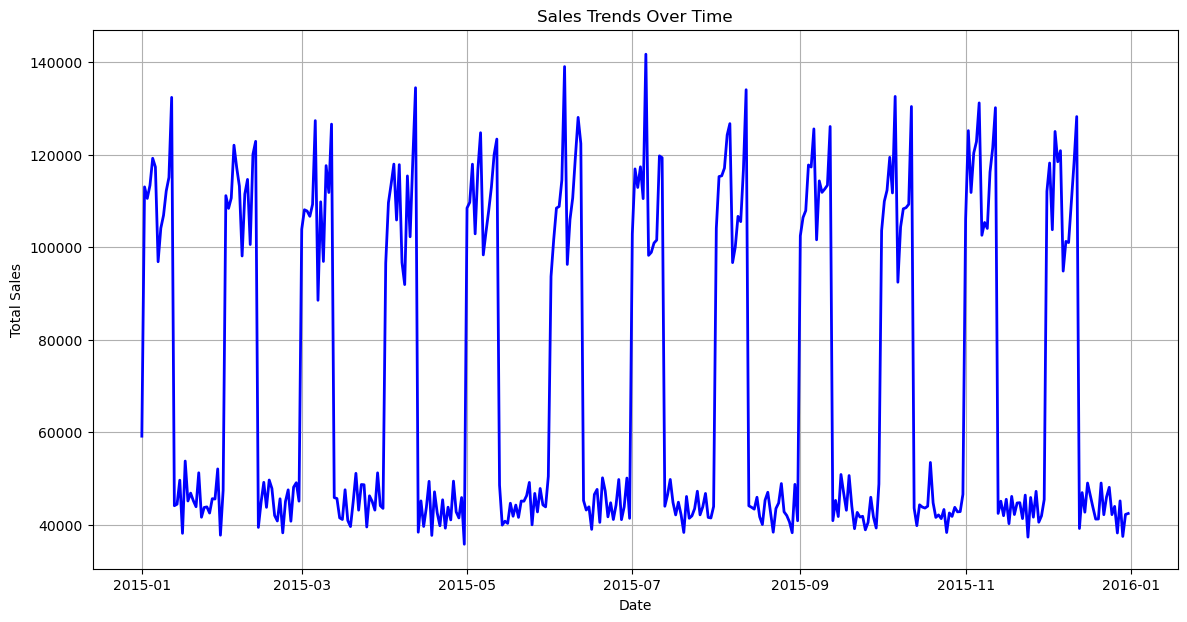

In [29]:
import matplotlib.pyplot as plt
# Aggregate sales data by date
sales_trends = transactions_df.groupby('trans_dt')['amount'].sum().reset_index()

# Plot the sales trends over time
plt.figure(figsize=(14, 7))
plt.plot(sales_trends['trans_dt'], sales_trends['amount'], color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trends Over Time')
plt.grid(True)
plt.show()


In [30]:
# Aggregate sales data by date
sales_trends = transactions_df.groupby('trans_dt')['amount'].sum().reset_index()

# Save the aggregated sales data to a CSV file
output_file_path = 'Sales_Trends.csv'
sales_trends.to_csv(output_file_path, index=False)

output_file_path


'Sales_Trends.csv'